**** Feature creation, EDA, and prediction using RF model**

I. Import the data and link both test and train to perform the feature engineering.

In [1]:
train<-read.csv("../input/titanic/train.csv")
test<-read.csv("../input/titanic/test.csv")
test$Survived<-NA
data<-rbind(train,test)
dim.train<-dim(train)
dim.test<-dim(test)
rm(test,train)

Analyze each variable

In [2]:
names(data)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

**1. PassengerID, Survived, Age, Fare** will be left as they are in the original dataset.
**2. Sex and class**



In [3]:
#Class
data$class1<-ifelse(data$Pclass==1,1,0)
data$class2<-ifelse(data$Pclass==2,1,0)
data$class3<-ifelse(data$Pclass==3,1,0)

#Sex
data$male<-ifelse(data$Sex=='male',1,0)
data$female<-ifelse(data$Sex=='female',1,0)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`summarise()` regrouping output by 'age.group' (override with `.groups` argument)

`summarise()` regrouping output by 'age.group' (override with `.groups` argument)



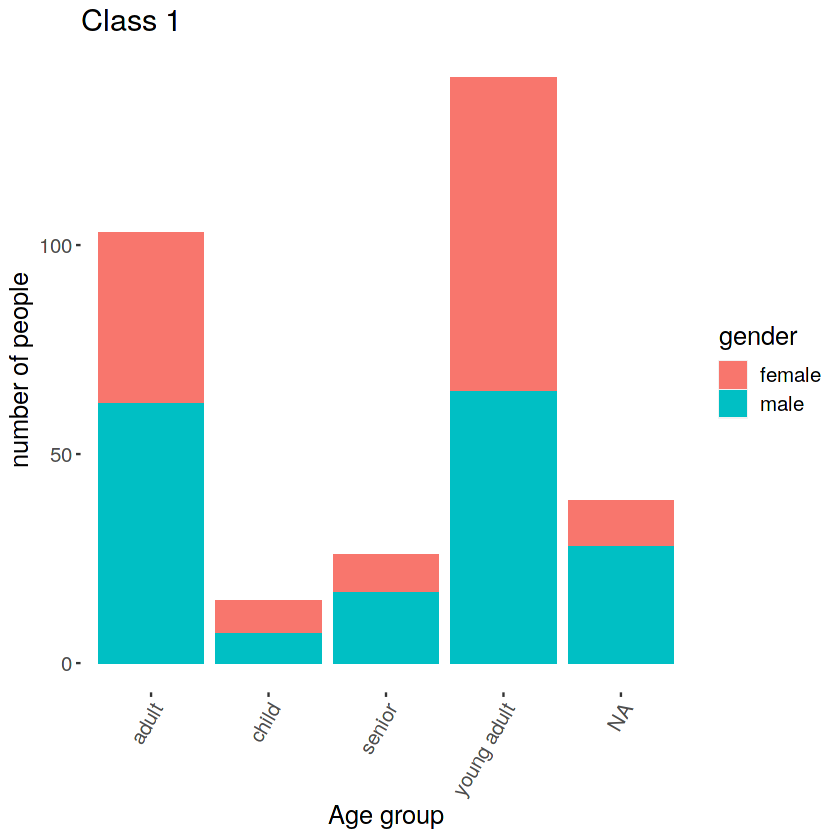

`summarise()` regrouping output by 'age.group' (override with `.groups` argument)



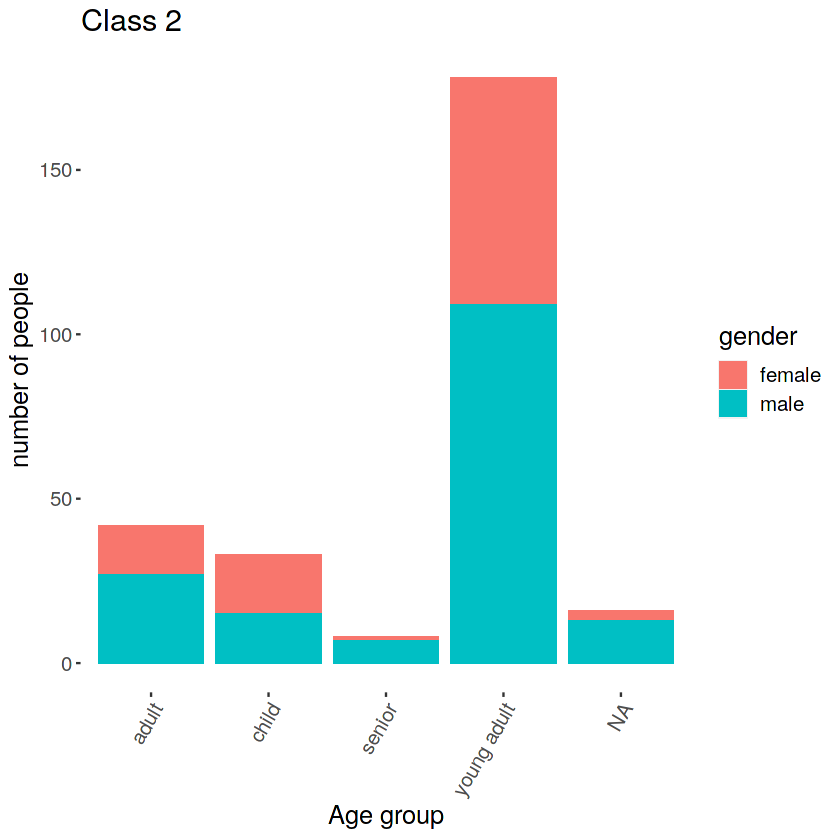

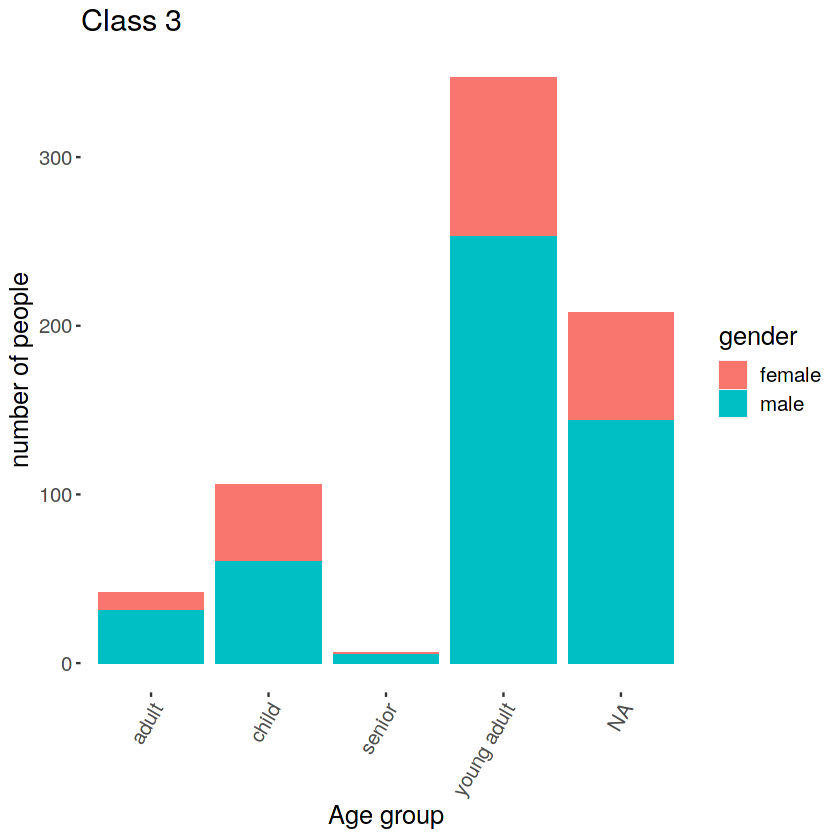

In [4]:
##Visualization

subdata<-as.data.frame(data$Sex)
names(subdata)<-"Sex"
subdata$Class<-data$Pclass
subdata$Age<-data$Age
subdata$age.group<-ifelse(subdata$Age<18,"child",(ifelse(subdata$Age<=40 & subdata$Age>=18,"young adult",(ifelse(subdata$Age<60 & subdata$Age>40,"adult",(ifelse(subdata$Age>=60,"senior",NA)))))))
subdata$age.group<-as.factor(subdata$age.group)

library(dplyr)
library(ggplot2)

#class1
subdata1 <- subdata %>% filter(Class==1)%>%group_by(age.group,Sex) %>%summarise( n = n())
subdata1$age.group<-as.factor(subdata1$age.group)

ggplot(subdata1,aes(x=subdata1$age.group,y=subdata1$n,fill=subdata1$Sex))+
  geom_bar(stat = "identity")+ labs(title="Class 1", x="Age group",y="number of people")+
  theme(panel.background = element_blank())+
  theme(text = element_text(size=15),axis.text.x = element_text(angle=60, hjust=1))+
  scale_fill_discrete(name="gender")

#class2
subdata2 <- subdata %>% filter(Class==2)%>%group_by(age.group,Sex) %>%summarise( n = n())
subdata2$age.group<-as.factor(subdata2$age.group)

ggplot(subdata2,aes(x=subdata2$age.group,y=subdata2$n,fill=subdata2$Sex))+
  geom_bar(stat = "identity")+ labs(title="Class 2", x="Age group",y="number of people")+
  theme(panel.background = element_blank())+
  theme(text = element_text(size=15),axis.text.x = element_text(angle=60, hjust=1))+
  scale_fill_discrete(name="gender")

#class3
subdata3 <- subdata %>% filter(Class==3)%>%group_by(age.group,Sex) %>%summarise( n = n())
subdata3$age.group<-as.factor(subdata3$age.group)

ggplot(subdata3,aes(x=subdata3$age.group,y=subdata3$n,fill=subdata3$Sex))+
  geom_bar(stat = "identity")+ labs(title="Class 3", x="Age group",y="number of people")+
  theme(panel.background = element_blank())+
  theme(text = element_text(size=15),axis.text.x = element_text(angle=60, hjust=1))+
  scale_fill_discrete(name="gender")

rm(subdata,subdata1,subdata2,subdata3)

### **3. Name.**
Useful information could be the family name, the first name and their title.
So I extract that information.

In [5]:

#3. Name


title<-as.data.frame(data$Name)
names(title)<-"name"

library(tidyr)
title<-separate(data=title,col=name,into=c("family.name","rest"),sep="," )

title<-separate(data=title,col=rest,into=c("title","first.name"),sep=". " )
title$title<-as.factor(title$title)
levels(title$title) 
data<-cbind(data,title)
data$Name<-NULL
rm(title)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 845 rows [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 21, 23, 24, 25, 26, ...].”


[1] " Capt"     " Col"      " Don"      " Dona"     " Dr"       " Jonkheer"
 [7] " Lady"     " Major"    " Master"   " Miss"     " Mlle"     " Mme"     
[13] " Mr"       " Mrs"      " Ms"       " Rev"      " Sir"      " th"

`summarise()` ungrouping output (override with `.groups` argument)



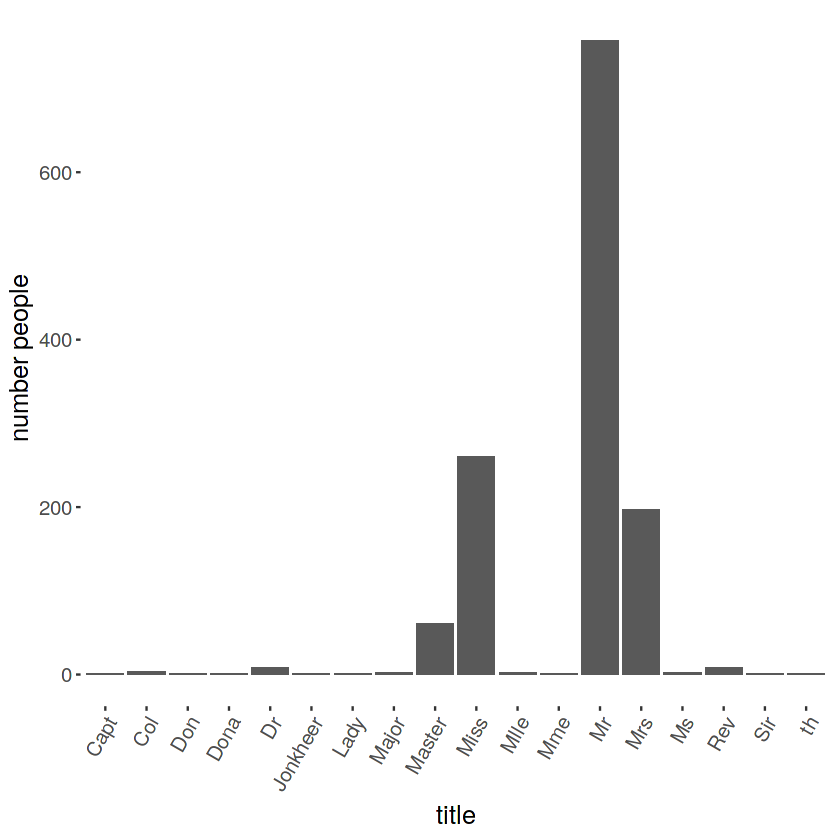

In [6]:
##Visualization
library(dplyr)
library(ggplot2)

title.all<-as.data.frame(data$title)
names(title.all)<-"title"
title.all$Survived<-as.factor(data$Survived)
title.all <- title.all %>% group_by(title) %>%summarise( n = n())
ggplot(title.all,aes(x=title,y=n))+
  geom_bar(stat = "identity")+theme(panel.background = element_blank())+
  scale_fill_brewer(direction = -1, palette = "Set1",name="Leyend")+
  labs(x="title",y="number people")+theme(text = element_text(size=15),axis.text.x = element_text(angle=60, hjust=1))
rm(title.all)

#### **4. Age.**
This will be kept as a numeric value but I could also extract if they person was a minor, a young adult, an older adult or a senior. **

In [7]:
#4. Age
data$minor<-ifelse(data$Age<18,1,0)
data$senior<-ifelse(data$Age>60,1,0)
data$young.adult<-ifelse(data$Age<=40 & data$Age>18,1,0)
data$adult<-ifelse(data$Age<60 & data$Age>40,1,0)

adult       child      senior young adult        NA's 
        187         154          40         665         263

`summarise()` regrouping output by 'Sex', 'age.group' (override with `.groups` argument)



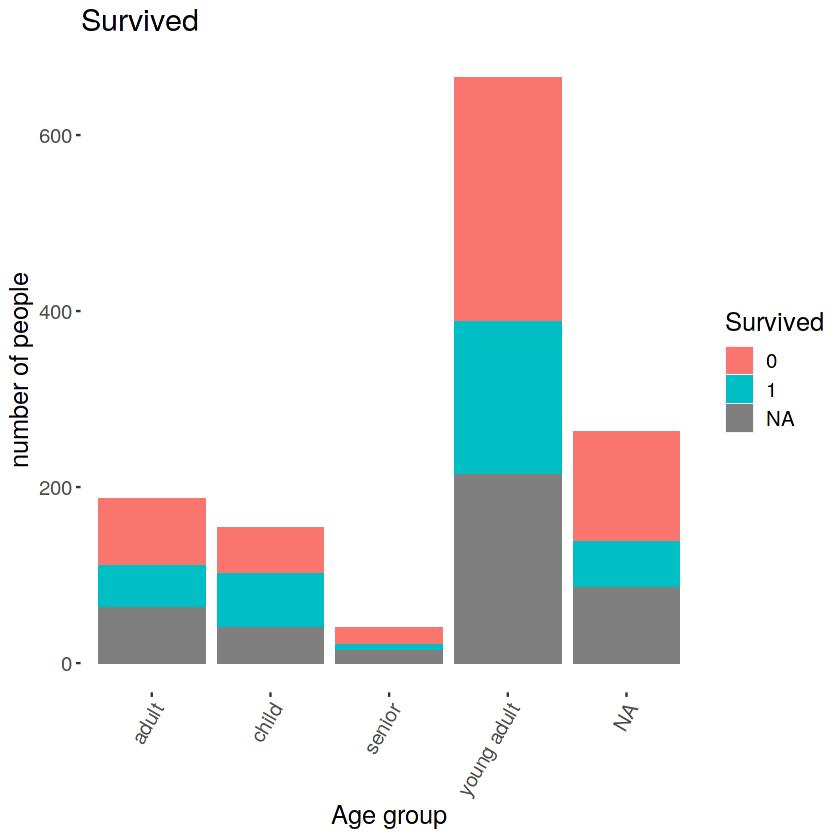

In [8]:
##Visualization

subdata4<-as.data.frame(data$Survived) #train set
names(subdata4)<-"Survived"
subdata4$Survived<-as.factor(subdata4$Survived)
subdata4$Sex<-data$Sex
subdata4$Age<-data$Age
subdata4$age.group<-ifelse(subdata4$Age<18,"child",(ifelse(subdata4$Age<=40 & subdata4$Age>=18,"young adult",(ifelse(subdata4$Age<60 & subdata4$Age>40,"adult",(ifelse(subdata4$Age>=60,"senior",NA)))))))
subdata4$age.group<-as.factor(subdata4$age.group)
summary(subdata4$age.group)

subdata4<-subdata4%>%group_by(Sex,age.group,Survived)%>%summarise(n())

ggplot(subdata4,aes(x=subdata4$age.group,y=subdata4$`n()` , fill=subdata4$Survived))+
         geom_bar(stat = "identity")+
  theme(panel.background = element_blank())+
  theme(text = element_text(size=15),axis.text.x = element_text(angle=60, hjust=1))+
  scale_fill_discrete(name="Survived")+labs(title="Survived", x="Age group",y="number of people")


##### **5. SibSp and Parch**:
These variables give information about the family size. I extract this and separate it into alone traveller, 2-person family, 3-person family and larger family (4 person or more).


In [9]:
#5. SibSp and Parch

#extract information into new data frame 
families<-data$SibSp
families<-as.data.frame(families)
names(families)<-"SibSp"
families$parch<-data$Parch

families$alone<-ifelse(families$parch==0 & families$SibSp==0,1,0)
families$two.person<-ifelse(families$parch==1&families$SibSp==0 | 
                              families$parch==0&families$SibSp==1 ,1,0)

families$three.person<-ifelse(families$parch==1&families$SibSp==1 | 
                              families$parch==0&families$SibSp==2 |
                              families$parch==2&families$SibSp==0,
                              1,0)
families$group<-ifelse(families$parch>1&families$SibSp>=1 | 
                         families$parch>=1&families$SibSp>1|
                                families$parch>2&families$SibSp==0 |
                                families$parch==0&families$SibSp>2,
                              1,0)
#delete columns 
families$SibSp<-NULL
families$parch<-NULL
data$SibSp<-NULL
data$Parch<-NULL

#bind the new dataframe with the dataset
data<-cbind(data,families)


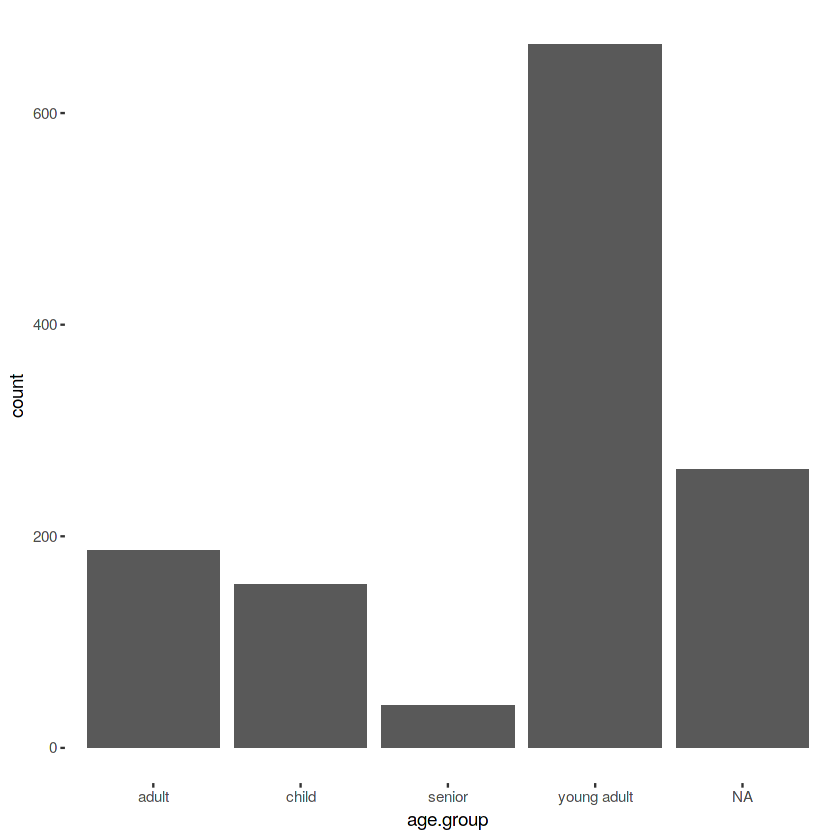

,alone,two.person,three.person,group,travel.with,Age,age.group,id
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<int>
1,1,0,0,0,alone,14,child,15
2,1,0,0,0,alone,15,child,23
3,1,0,0,0,alone,17,child,85
4,1,0,0,0,alone,17,child,115
5,1,0,0,0,alone,16,child,139
6,1,0,0,0,alone,16,child,157


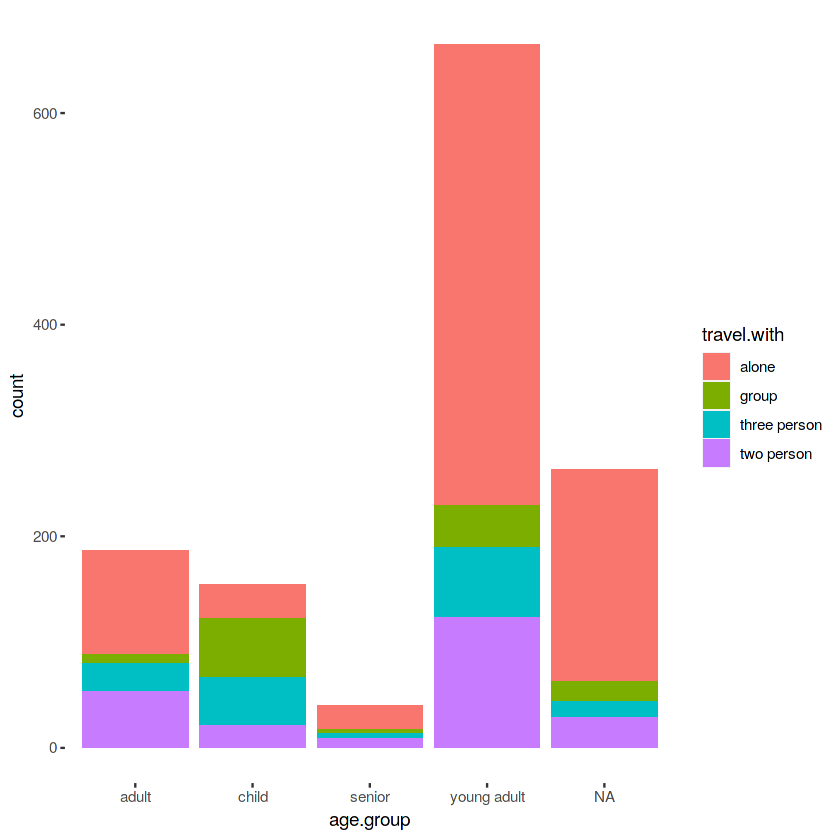

In [10]:
##Visualization

families$travel.with<-ifelse(families$alone==1,"alone",ifelse(families$two.person==1 ,"two person",ifelse(families$three.person==1,"three person",ifelse(families$group==1,"group",NA))))
families$travel.with<-as.factor(families$travel.with)
families$Age<-data$Age
families$age.group<-ifelse(families$Age<18,"child",(ifelse(families$Age<=40 & families$Age>=18,"young adult",(ifelse(families$Age<60 & families$Age>40,"adult",(ifelse(families$Age>=60,"senior",NA)))))))
families$age.group<-as.factor(families$age.group)

ggplot(families,aes(x=age.group))+geom_bar()+theme(panel.background = element_blank())

ggplot(families,aes(x=age.group,fill=travel.with))+geom_bar()+theme(panel.background = element_blank())

#child travelling alone?, example id 778, problem with the record, probably family not registered.
#https://www.encyclopedia-titanica.org/titanic-survivor/virginia-ethel-emanuel.html

#check child travelling alone
child.alone<-families
child.alone$id<-data$PassengerId
child.alone<-child.alone%>%filter(age.group=="child",travel.with=="alone")
head(child.alone)

#many people travelling alone, and many NA and age information: not a complete record

rm(families)

6. Cabin

This variable gives information about the deck where the travellers were staying.
This could give an extra detailed information about each class and the location of the cabins in the ship.
I separate this information into Deck A, Deck B, Deck C, Deck D, Deck E and Deck F.


In [11]:
#6. Cabin

levels(data$Cabin)

library(stringi)
data$Deck.A<-ifelse(stri_detect_fixed(data$Cabin,'A'),1,0)
data$Deck.B<-ifelse(stri_detect_fixed(data$Cabin,'B'),1,0)
data$Deck.C<-ifelse(stri_detect_fixed(data$Cabin,'C'),1,0)
data$Deck.D<-ifelse(stri_detect_fixed(data$Cabin,'D'),1,0)
data$Deck.E<-ifelse(stri_detect_fixed(data$Cabin,'E'),1,0)
data$Deck.F<-ifelse(stri_detect_fixed(data$Cabin,'F'),1,0)
data$Deck.T<-ifelse(stri_detect_fixed(data$Cabin,'T'),1,0)
data$Cabin<-NULL



[1] ""                "A10"             "A14"             "A16"            
  [5] "A19"             "A20"             "A23"             "A24"            
  [9] "A26"             "A31"             "A32"             "A34"            
 [13] "A36"             "A5"              "A6"              "A7"             
 [17] "B101"            "B102"            "B18"             "B19"            
 [21] "B20"             "B22"             "B28"             "B3"             
 [25] "B30"             "B35"             "B37"             "B38"            
 [29] "B39"             "B4"              "B41"             "B42"            
 [33] "B49"             "B5"              "B50"             "B51 B53 B55"    
 [37] "B57 B59 B63 B66" "B58 B60"         "B69"             "B71"            
 [41] "B73"             "B77"             "B78"             "B79"            
 [45] "B80"             "B82 B84"         "B86"             "B94"            
 [49] "B96 B98"         "C101"            "C103"            "C104"           
 [53] "C106"            "C110"            "C111"            "C118"           
 [57] "C123"            "C124"            "C125"            "C126"           
 [61] "C128"            "C148"            "C2"              "C22 C26"        
 [65] "C23 C25 C27"     "C30"             "C32"             "C45"            
 [69] "C46"             "C47"             "C49"             "C50"            
 [73] "C52"             "C54"             "C62 C64"         "C65"            
 [77] "C68"             "C7"              "C70"             "C78"            
 [81] "C82"             "C83"             "C85"             "C86"            
 [85] "C87"             "C90"             "C91"             "C92"            
 [89] "C93"             "C95"             "C99"             "D"              
 [93] "D10 D12"         "D11"             "D15"             "D17"            
 [97] "D19"             "D20"             "D21"             "D26"            
[101] "D28"             "D30"             "D33"             "D35"            
[105] "D36"             "D37"             "D45"             "D46"            
[109] "D47"             "D48"             "D49"             "D50"            
[113] "D56"             "D6"              "D7"              "D9"             
[117] "E10"             "E101"            "E12"             "E121"           
[121] "E17"             "E24"             "E25"             "E31"            
[125] "E33"             "E34"             "E36"             "E38"            
[129] "E40"             "E44"             "E46"             "E49"            
[133] "E50"             "E58"             "E63"             "E67"            
[137] "E68"             "E77"             "E8"              "F E69"          
[141] "F G63"           "F G73"           "F2"              "F33"            
[145] "F38"             "F4"              "G6"              "T"              
[149] "A11"             "A18"             "A21"             "A29"            
[153] "A9"              "B10"             "B11"             "B24"            
[157] "B26"             "B36"             "B45"             "B52 B54 B56"    
[161] "B61"             "C105"            "C116"            "C130"           
[165] "C132"            "C28"             "C31"             "C39"            
[169] "C51"             "C53"             "C55 C57"         "C6"             
[173] "C80"             "C89"             "C97"             "D22"            
[177] "D34"             "D38"             "D40"             "D43"            
[181] "E39 E41"         "E45"             "E52"             "E60"            
[185] "F"               "F E46"           "F E57"

**7. Tickets**

This information is not easy to analyze and find how it could help in the prediction. The number and the prefix of the ticket makes me think could be linked to the time or place where the ticket was bought.
I decided to delete it.

In [12]:
#7. Ticket
data$Ticket<-NULL 

**8. Embarked**

Where the person embarked. Change it into dummy variable.

In [13]:
#8. Embarked

levels(data$Embarked)
data$Port.Cherbourg<-ifelse(stri_detect_fixed(data$Embarked,'C'),1,0)
data$Port.Queenstown<-ifelse(stri_detect_fixed(data$Embarked,'Q'),1,0)
data$Port.Southampton<-ifelse(stri_detect_fixed(data$Embarked,'S'),1,0)
data$Embarked<-NULL

[1] ""  "C" "Q" "S"

**Other adjustments**

In [14]:
library(dplyr)
glimpse(data)

data$Survived<-as.factor(data$Survived)
data$Age<-as.numeric(data$Age)
data$Fare<-as.numeric(data$Fare)
data$family.name<-as.factor(data$family.name)
data$first.name<-as.factor(data$first.name)


#veri si borrar
data$family.name<-NULL
data$first.name<-NULL

Rows: 1,309
Columns: 32
$ PassengerId      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1…
$ Survived         <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1…
$ Pclass           <int> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2…
$ Sex              <fct> male, female, female, female, male, male, male, male…
$ Age              <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39…
$ Fare             <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51…
$ class1           <dbl> 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ class2           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1…
$ class3           <dbl> 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0…
$ male             <dbl> 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1…
$ female           <dbl> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0…
$ family.name      <chr> "Braund", "Cumings", "Heikkinen", "Futrelle", "Allen…
$ title            <fct>  Mr

**II. ****Training the model**

Split the data into test&train as the original dataset.

Another split in the train data in order to obtain confusion matrix.

In [15]:
# Original rows of train and test dataset
dim.data<-dim(data)
dim.train<-dim.train[1]
dim.test<-dim.test[1]
dim.data<-dim.data[1]
train<-data[1:dim.train,]
dim<-dim.train+1
test<-data[dim:dim.data,]
rm(dim,dim.test,dim.train,dim.data)

#split test dataset

library(caTools)
split <- sample.split(train$Survived, SplitRatio = 0.75)
train.train <- subset(train,split == TRUE) 
train.test <- subset(train,split == FALSE) 

In [16]:
#Random forest model

train.train<-drop_na(train.train)

library(randomForest)
set.seed(1)
modelo_randomforest <- randomForest(Survived~., 
                                    data=train.train, ntree = 1000,
                                    nodesize = 5,
                                    importance=TRUE,keep.forest=TRUE)
modelo_randomforest


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine





Call:
 randomForest(formula = Survived ~ ., data = train.train, ntree = 1000,      nodesize = 5, importance = TRUE, keep.forest = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 5

        OOB estimate of  error rate: 18.05%
Confusion matrix:
    0   1 class.error
0 278  37   0.1174603
1  59 158   0.2718894